In [1]:
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

In [2]:
df_training = pd.read_csv('df_training_pre_processing_to_model.csv')

In [3]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   graduacao                   6578 non-null   int64  
 1   universidade                6578 non-null   int64  
 2   profissao                   6578 non-null   int64  
 3   organizacao                 6578 non-null   int64  
 4   pretende_fazer_cursos_lit   6578 non-null   float64
 5   interesse_mba_lit           6578 non-null   float64
 6   importante_ter_certificado  6578 non-null   float64
 7   horas_semanais_estudo       6578 non-null   float64
 8   como_conheceu_lit           6578 non-null   int64  
 9   modulos_iniciados           6578 non-null   float64
 10  modulos_finalizados         6578 non-null   float64
 11  certificados                6578 non-null   float64
 12  categoria                   6578 non-null   object 
dtypes: float64(7), int64(5), object(1

In [4]:
df_training.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,modulos_iniciados,modulos_finalizados,certificados,categoria
6573,0,20,9,7,0.0,0.0,1.0,6.0,6,39.0,32.0,0.0,perfil2
6574,0,6,6,11,1.0,1.0,1.0,6.0,6,166.0,102.0,0.0,perfil4
6575,5,11,10,9,0.0,0.0,1.0,8.0,2,37.0,31.0,0.0,perfil2
6576,5,17,0,4,0.0,0.0,1.0,10.0,6,102.0,93.0,1.0,perfil1
6577,4,4,8,9,1.0,1.0,1.0,9.0,6,98.0,97.0,1.0,perfil1


In [5]:
#Definindo as features e o target

features = df_training[
    [
        'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'modulos_iniciados', 'modulos_finalizados',
       'certificados'
    ]
]
target = df_training['categoria'] 


In [6]:
X = features
y = target 

In [8]:
#Aplicando o balanceamento

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smt = SMOTE('all', random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=133)

X, y = smt.fit_resample(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


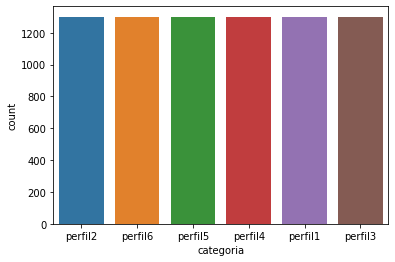

In [9]:
import seaborn as sns
import numpy as np 

ax = sns.countplot(x=y)

In [10]:
from sklearn.metrics import accuracy_score

#### Random Forest

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier( 
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=15,
    max_features=0.25,
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    min_samples_leaf=1,
    min_samples_split=6,
    min_weight_fraction_leaf=0.0,
    n_estimators=250,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

i = 1
for train_index, test_index in kfold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  clf.fit(X_train, y_train)
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, clf.predict(X_test))}")
  i += 1

y_pred = clf.predict(X_test)

print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 4)))

Accuracy for the fold no. 1 on the test set: 0.8501920614596671
Accuracy for the fold no. 2 on the test set: 0.8616271620755925
Accuracy for the fold no. 3 on the test set: 0.8590647021140295
Accuracy for the fold no. 4 on the test set: 0.8456117873158232
Accuracy for the fold no. 5 on the test set: 0.8609865470852018
Acurácia: 86.1%


#### Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(ccp_alpha=0.0,
 criterion='friedman_mse',
 init=None,
 learning_rate=0.1,
 loss='deviance',
 max_depth=3,
 max_features=0.5,
 max_leaf_nodes=None,
 min_impurity_decrease=0.0,
 min_impurity_split=None,
 min_samples_leaf=1,
 min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 n_estimators=50,
 n_iter_no_change=None,
 random_state=None,
 subsample=1.0,
 tol=0.0001,
 validation_fraction=0.1,
 verbose=0,
 warm_start=False)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

i = 1
for train_index, test_index in kfold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  gb_clf.fit(X_train, y_train)
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, gb_clf.predict(X_test))}")
  i += 1

y_pred = gb_clf.predict(X_test)

print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 4)))

Accuracy for the fold no. 1 on the test set: 0.8431498079385403
Accuracy for the fold no. 2 on the test set: 0.8539397821909033
Accuracy for the fold no. 3 on the test set: 0.846252402306214
Accuracy for the fold no. 4 on the test set: 0.8379244074311338
Accuracy for the fold no. 5 on the test set: 0.8468930172966047
Acurácia: 84.69%


#### Extra Trees Classifier

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

extc = ExtraTreesClassifier(
 bootstrap=False,
 ccp_alpha=0.0,
 class_weight=None,
 criterion='gini',
 max_depth=None,
 max_features='sqrt',
 max_leaf_nodes=None,
 max_samples=None,
 min_impurity_decrease=0.0,
 min_impurity_split=None,
 min_samples_leaf=1,
 min_samples_split=6,
 min_weight_fraction_leaf=0.0,
 n_estimators=150,
 n_jobs=None,
 oob_score=False,
 random_state=None,
 verbose=0,
 warm_start=False
)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

i = 1
for train_index, test_index in kfold.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  extc.fit(X_train, y_train)
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, extc.predict(X_test))}")
  i += 1

y_pred = extc.predict(X_test)

print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred), 4)))


Accuracy for the fold no. 1 on the test set: 0.8444302176696543
Accuracy for the fold no. 2 on the test set: 0.8577834721332479
Accuracy for the fold no. 3 on the test set: 0.8526585522101218
Accuracy for the fold no. 4 on the test set: 0.8449711723254324
Accuracy for the fold no. 5 on the test set: 0.8584240871236387
Acurácia: 85.84%


#### Avaliação do modelo

In [12]:
#Matrix de Confusão

import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

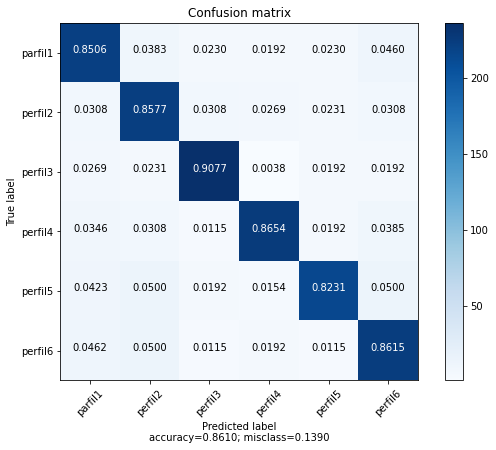

              precision    recall  f1-score   support

     perfil1       0.83      0.85      0.84       261
     perfil2       0.82      0.86      0.84       260
     perfil3       0.90      0.91      0.91       260
     perfil4       0.91      0.87      0.89       260
     perfil5       0.90      0.82      0.86       260
     perfil6       0.82      0.86      0.84       260

    accuracy                           0.86      1561
   macro avg       0.86      0.86      0.86      1561
weighted avg       0.86      0.86      0.86      1561



In [13]:
#Avaliação

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

print(classification_report(y_test, y_pred))